David Íñiguez and Jaume Sánchez

---



**Constrained Optimization: Equality Constraints**

## First of all, some imports

In [89]:
import numpy as np
from math import exp as e
import matplotlib.pyplot as plt

## Theoretical introduction

We apply the Sequential Quadratic Optimization method to the problem:

>> minimize $f(x,y) = e^{3x} + e^{-4y}$

>> subject to $h(x,y) = x^2 + y^2 -1 = 0$

Now, defining $X = (x,y)$, we build the Lagrangian:

>> $\mathscr{L}(X,\lambda) = f(X) - \lambda h(X)$

The first order optimality condition is $∇\mathscr{L}(X,\lambda) = 0$. We use the Newton method to minimize the Lagrange function.

>>$\begin{pmatrix} X^{k+1} \\ \lambda^{k+1} \ \end{pmatrix} = \begin{pmatrix} X^{k} \\ \lambda^{k} \ \end{pmatrix} +\alpha \begin{pmatrix} d^{k} \\ \nu^{k} \ \end{pmatrix}$

Where $d^k$ and $\nu^k$ are the solution to the Newton linear system

>> $\nabla ^2 \mathscr{L}(X^k,\lambda^k) \begin{pmatrix} d^{k} \\ \nu^{k} \ \end{pmatrix} = -\nabla \mathscr{L}(X^k,\lambda^k)$

That can be expressed as follows:

>> $\begin{pmatrix} \nabla ^2_{xx} \mathscr{L}(X^k,\lambda^k) & -\nabla h(X*k) \\ -\nabla h(X^k) & 0 \end{pmatrix} \begin{pmatrix} d^{k} \\ \nu^{k} \ \end{pmatrix} = \begin{pmatrix} -\nabla _{x} \mathscr{L}(X^k,\lambda^k) \\ h(X^{k}) \ \end{pmatrix}$

To get to this condition, we must first compute the gradient and the Hessian of $f(X), h(X), \mathscr{L}(X,\lambda)$:

>> $\nabla f(X) = \nabla f(x,y) = (3e^{3x},-4e^{-4x})$

>> $\nabla ^2 f(x^*) = \begin{pmatrix}
3e^{3x} & 0\\
0 & 16e^{-4x}
\end{pmatrix}
$

>> $\nabla h(X) = \nabla h(x,y) = (2x,2y)$

>> $\nabla ^2 f(x^*) = \begin{pmatrix}
2 & 0\\
0 & 2
\end{pmatrix}
$

>> $\nabla _x \mathscr{L}(X,\lambda) =  \nabla _{x} \mathscr{L}(x,y,\lambda) =  \nabla f(x,y) -\lambda  \nabla h(x,y) = (3e^{3x} -2\lambda x, -4e^{-4x} -2\lambda x)$

>> $\nabla ^2_{xx} \mathscr{L}(X,\lambda) =  \nabla ^2_{xx} \mathscr{L}(x,y,\lambda) =  \nabla f(x,y) -\lambda  \nabla h(x,y) = \begin{pmatrix} 9e^{3x} -2\lambda & 0 \\ 0 & 16e^{-4x} -2\lambda \end{pmatrix}$

In [90]:
#Exercise 1
#Some definitions
def f(x,y):
  return(e(3*x) + e(-4*y))

def h(x,y):
  return( x*x + y*y -1)

def gradf(x,y):
  return(np.array([3*e(3*x), -4*e(-4*y)]))

def gradh(x,y):
  return(np.array([2*x,2*y]))

def hessianf(x,y):
  H = np.zeros((2,2))
  H[0][0] = 9*e(3*x)
  H[1][0] =  0
  H[0][1] = 0
  H[1][1] =  16*e(-4*y)
  return(H)

def hessianh(x,y):
  H = np.zeros((2,2))
  H[0,0] = 2
  H[1,0] = 0
  H[0,1] = 0
  H[1,1] = 2
  return(H)

def L(x,y,lam):
  return(f(x,y) - lam*h(x,y))
def gradL(x,y,lam):
  return(gradf(x,y) - lam*gradh(x,y))
def hessianL(x,y,lam):
  return(hessianf(x,y) - lam*hessianh(x,y))

With all the derivatives defined, we can now compute the Newton method, explained at the beginning of the notebook.

In [91]:
def Newton(x,y,lam,alpha):

  X = []
  Y = []
  L = []

  X.append(x)
  Y.append(y)
  L.append(lam)

  sol =np.zeros(3)
  A = np.zeros((3,3))
  b = np.zeros(3)
  tol = 10**(-3)
  cont = 0

  while(np.linalg.norm(gradL(x,y,lam))>=tol):

    #Creation of the matrix
    A[0][0] = hessianL(x,y,lam)[0][0]
    A[1][0] = hessianL(x,y,lam)[1][0]
    A[0][1] = hessianL(x,y,lam)[0][1]
    A[1][1] = hessianL(x,y,lam)[1][1]
    A[0][2] = A [2][0] = -gradh(x,y)[0]
    A[1][2] = A[2][1] = -gradh(x,y)[1]

    #Creation of the vector
    b[0] = -gradL(x,y,lam)[0]
    b[1] = -gradL(x,y,lam)[1]
    b[2] = h(x,y)


    sol = np.linalg.solve(A,b) #Solve the system

    #New (x,y) and lam
    x += alpha*sol[0]
    y += alpha*sol[1]
    lam +=  alpha*sol[2]

    X.append(x)
    Y.append(y)
    L.append(lam)

    cont+=1

  return X,Y,L,cont

In [92]:
solution = [-0.74834, 0.66332, -0.21233]

# Exercise 1

In [93]:
def error_newton (X,Y,L):
  error = []
  for i in range (len(X)):
    error.append(np.linalg.norm([X[i]-solution[0],Y[i]-solution[1],L[i]-solution[2]]))
  return error

In [94]:
X1,Y1,L1,cont1 = Newton(-1,1,-1,1)
print ('Final solution: ', X1[cont1-1], Y1[cont1-1] ,L1[cont1-1])
error1 = error_newton(X1,Y1,L1)

Final solution:  -0.7486452260711557 0.6661389255639086 -0.2160587285936944


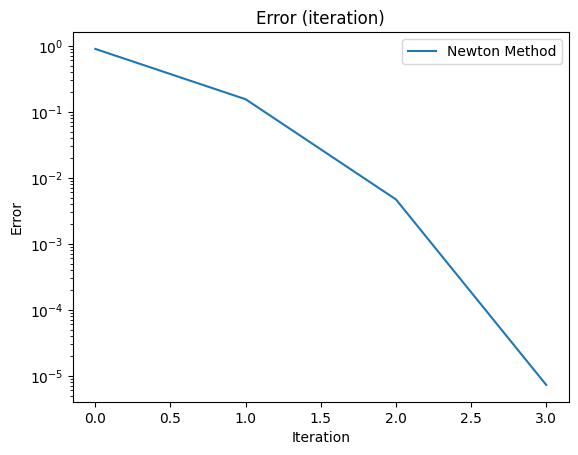

In [95]:
plt.plot(error1,label='Newton Method')
plt.yscale('log')
plt.legend(loc='upper right')
plt.title('Error (iteration)')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

# Exercise 2


In [110]:
X2 = []
Y2 = []
L2 = []
X_vec = []
Y_vec  = []
L_vec = []
cont2 = []
error2 = []
for i in range(4):
  x = (i +np.random.rand())*(-1)**np.random.randint(2)
  y = (i+np.random.rand())*(-1)**np.random.randint(2)
  lam = (i+np.random.rand())*(-1)**np.random.randint(2)
  X_vec.append(x) #we save this values in order to do comparisons in exercise 4
  Y_vec.append(y)
  L_vec.append(lam)
  Xaux,Yaux,Laux,contaux = Newton(x,y,lam,1)
  print("Initial values:", (x,y,lam), "and last values are: ", (Xaux[contaux-1], Yaux[contaux-1] ,Laux[contaux-1]),"with ",contaux, "iterations")
  X2.append(Xaux)
  Y2.append(Yaux)
  L2.append(Laux)
  cont2.append(contaux)
  error2.append(error_newton(Xaux,Yaux,Laux))

Initial values: (0.7952912608045432, 0.8363818158124455, 0.34579541825182003) and last values are:  (-0.7506554885074963, 0.6627462486852355, -0.2051829619008722) with  7 iterations
Initial values: (-1.3572427120389072, 1.9977225639652778, 1.0653483768478014) and last values are:  (-0.7472085345332955, 0.6670440228054852, -0.20837462447830946) with  13 iterations
Initial values: (2.3520831975315115, 2.2861542527833794, -2.0313730336741758) and last values are:  (0.9103736472107078, -0.41382517706718625, 25.291797238447415) with  10 iterations
Initial values: (-3.1969336948230858, -3.6581168632672094, 3.2107739783557756) and last values are:  (0.01454043687342373, -0.9999962792815678, 109.18291251187382) with  14 iterations


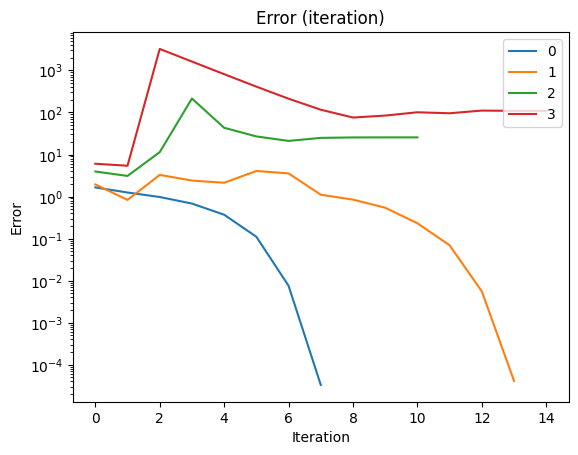

In [111]:
for i in range (4):
  plt.plot(error2[i], label =i)

plt.yscale('log')
plt.legend(loc='upper right')
plt.title('Error (iteration)')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

We can see that as long as the starting points are further away from the solution, the algorithm is not able to find the optimal solution. That is why we are going to introduce a new function that will help us in getting nearer to it.

# Introducing the merit function

We now introduce the merit function, defined as:

>> $\mathscr{M}(x,y) = f(x,y) + ρh(x,y)^2$

And its gradient:

>> $\nabla \mathscr{M}(x,y) = \nabla f(x,y) + 2ρh(x,y)\nabla h(x,y)$

In [112]:
def merit(x,y,rho):
  return( f(x,y) + rho*(h(x,y)**2))
def gradmerit(x,y,rho):
  return(gradf(x,y) + 2 * rho * h(x, y) * gradh(x, y))

Computation of the gradient method algorithm

In [113]:
def gradient_method(x,y,rho):
  X = []
  Y = []
  tol = 10**(-3)
  X.append(x)#initial w0
  Y.append(y) #initial w1
  grad = gradmerit(x,y,rho)/np.linalg.norm(gradmerit(x,y,rho))
  cont = 0
  while(np.linalg.norm(grad) >= tol):
      alpha = 1
      while (merit(X[cont] - alpha*grad[0],Y[cont] - alpha*grad[1],rho) >= merit(X[cont],Y[cont],rho)):
        alpha/=2
        if(alpha <= 10**(-10)):
          break

      if(alpha <= 10**(-10)):
        break
      cont+= 1
      X.append(X[cont-1] - alpha*grad[0])
      Y.append(Y[cont-1] - alpha*grad[1])
      grad =  gradmerit(X[cont],Y[cont],rho)/np.linalg.norm(gradmerit(X[cont],Y[cont],rho))

  print("Number of iterations", cont)
  print("Last iteration: (%.2e,%.2e): " % (X[cont],Y[cont]))
  return X,Y,cont

In [114]:
def error_gradient (x,y):
  error = []
  for i in range (len(x)):
    error.append(((x[i]-solution[0])**2+(y[i]-solution[1])**2)**(1/2))
  return error

# Exercise 3

Implementation of the gradient method algorithm

In [115]:
X3, Y3, cont3 = gradient_method(7,8,10)
error3 = error_gradient(X3,Y3)

Number of iterations 383
Last iteration: (-7.52e-01,6.67e-01): 


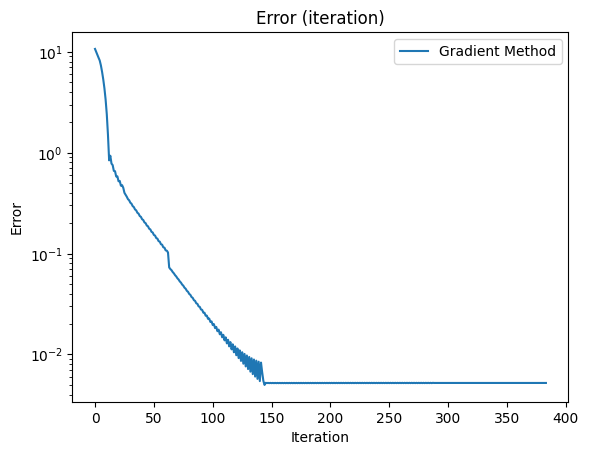

In [116]:
plt.plot(error3, label = 'Gradient Method')
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right')
plt.title('Error (iteration)')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

We can see that the algorithm converges to a solution that is near to the optimal one, but with less precision that the Newton method. However, when located far away from the optimal point, this algorithm works better than the first one. It is reasonable to implement a new algorithm that is a combination of these two methods when we are located far from the solution, starting with the gradient descent to find an approximate solution, and then the Newton one to get to the exact solution.

# Exercise 4

Implementation of the gradient method algorithm and then aplication of the Newton method to get closer to the analytic solution. Let's choose points that are far away of the optimal solution.

Initial point: $(x,y) = (7,8) $

In [117]:
X41, Y41, cont41 = gradient_method(7,8,10)
error41 = error_gradient(X41,Y41)
X42, Y42, L42, cont42 = Newton(X41[cont41-1],Y41[cont41-1],-1,1)
error42 = error_gradient (X42,Y42)
print ('Final solution: ', (X42[cont42-1], Y42[cont42-1] ,L42[cont42-1]))

Number of iterations 383
Last iteration: (-7.52e-01,6.67e-01): 
Final solution:  (-0.7484501838286682, 0.6632113213053085, -0.2163705653837511)


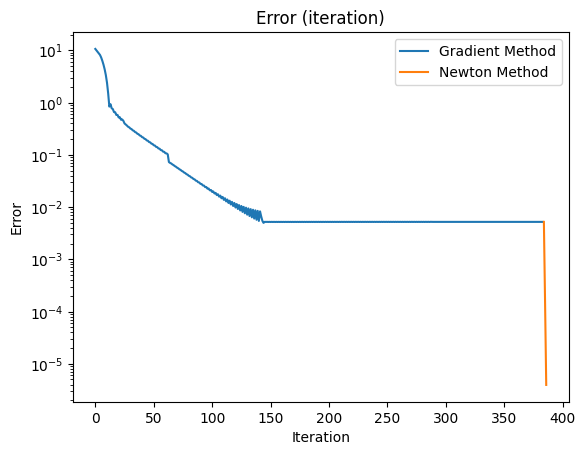

In [118]:
plt.plot(np.arange(start=0, stop=cont41+1, step=1), error41, label = 'Gradient Method')
plt.plot(np.arange(start=cont41+1, stop=cont41+cont42+2, step=1), error42, label = 'Newton Method')
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right')
plt.title('Error (iteration)')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

Let us compute another example
Initial point: $(x,y) = (15,-15)$

In [119]:
X43, Y43, cont43 = gradient_method(15,-15,10)
error43 = error_gradient(X43,Y43)
X44, Y44, L44, cont44 = Newton(X43[cont43-1],Y43[cont43-1],-1,1)
error44 = error_gradient(X44,Y44)
print ('Final solution: ', (X44[cont44-1], Y44[cont44-1] ,L44[cont44-1]))

Number of iterations 359
Last iteration: (-7.52e-01,6.67e-01): 
Final solution:  (-0.7484501837054944, 0.6632113214443592, -0.21637056538399135)


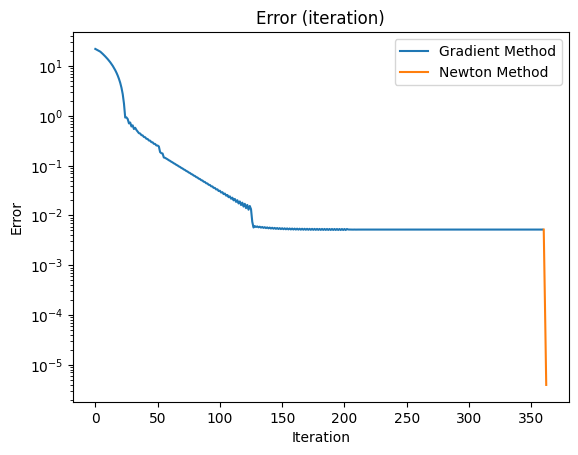

In [120]:
plt.plot(np.arange(start=0, stop=cont43+1, step=1), error43, label = 'Gradient Method')
plt.plot(np.arange(start=cont43+1, stop=cont43+cont44+2, step=1), error44, label = 'Newton Method')
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right')
plt.title('Error (iteration)')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

As we can see, by applying the Newton method late in the algorithm helps in finding the optimal solution.

As a final comparison, let us compare the new algorithm with the points that we already tried in exercise 2.


Initial point: (0.7952912608045432, 0.8363818158124455, 0.34579541825182003)
Number of iterations 379
Last iteration: (-7.52e-01,6.67e-01): 
Final solution:  (-0.747703550169921, 0.6640541611177039, -0.20937752814485577)


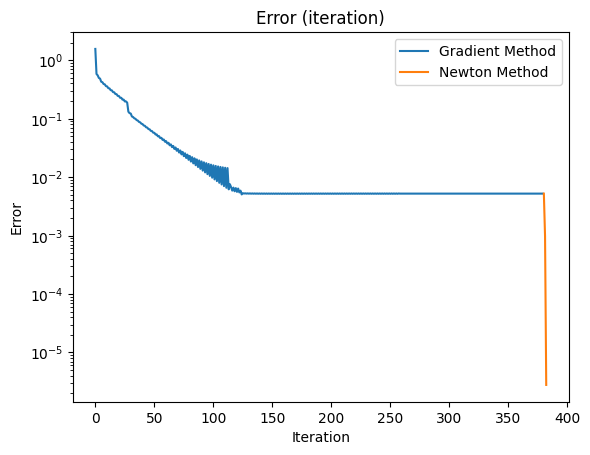

Initial point: (-1.3572427120389072, 1.9977225639652778, 1.0653483768478014)
Number of iterations 289
Last iteration: (-7.52e-01,6.67e-01): 
Final solution:  (-0.7488124315859411, 0.6628023967407275, -0.20573436187845173)


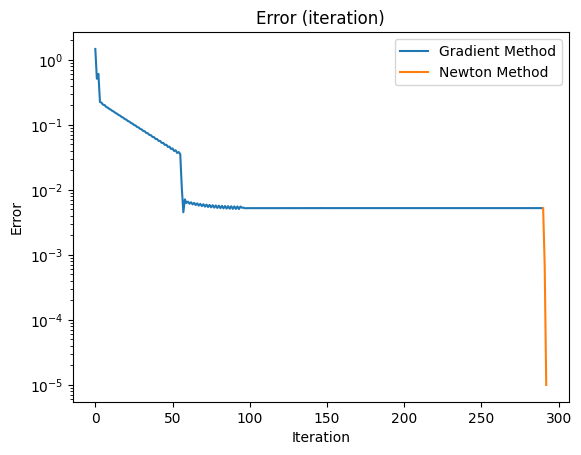

Initial point: (2.3520831975315115, 2.2861542527833794, -2.0313730336741758)
Number of iterations 383
Last iteration: (-7.52e-01,6.67e-01): 
Final solution:  (-0.7484889621574329, 0.6631675462534828, -0.22169591784172105)


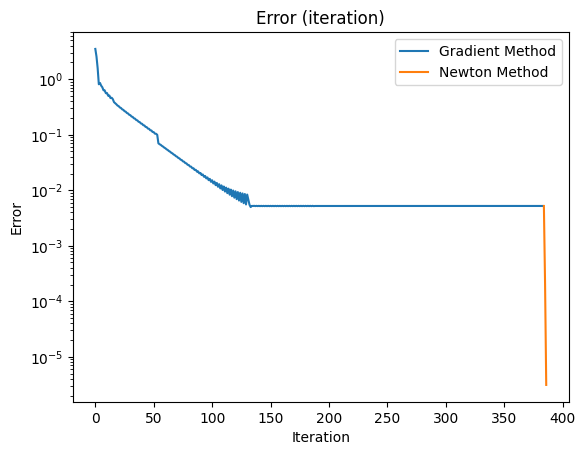

Initial point: (-3.1969336948230858, -3.6581168632672094, 3.2107739783557756)
Number of iterations 266
Last iteration: (-7.52e-01,6.67e-01): 
Final solution:  (-0.7486001509993156, 0.6630420303841661, -0.19464838580042398)


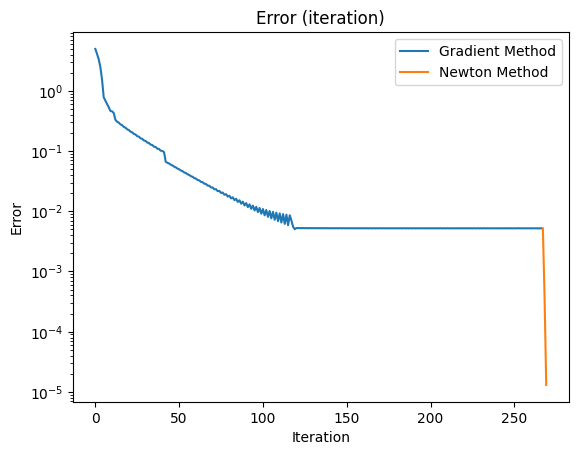

In [121]:
for i in range(4):
  print('Initial point:', (X_vec[i],Y_vec[i], L_vec[i]))
  X5, Y5, cont5 = gradient_method(X_vec[i],Y_vec[i],10)
  error5 = error_gradient(X5,Y5)
  X6, Y6, L6, cont6 = Newton(X5[cont5-1],Y5[cont5-1],L_vec[i],1)
  error6 = error_gradient(X6,Y6)
  print ('Final solution: ', (X6[cont6-1], Y6[cont6-1] ,L6[cont6-1]))
  plt.plot(np.arange(start=0, stop=cont5+1, step=1), error5, label = 'Gradient Method')
  plt.plot(np.arange(start=cont5+1, stop=cont5+cont6+2, step=1), error6, label = 'Newton Method')
  #plt.xscale('log')
  plt.yscale('log')
  plt.legend(loc='upper right')
  plt.title('Error (iteration)')
  plt.xlabel('Iteration')
  plt.ylabel('Error')
  plt.show()

To sum up, we can see how using the same points as before we have more iterations and we spend more time but we obtain better solutions in all the cases, regardless of whether the point is far away or not.